In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy  
import scikits.bootstrap as bootstrap
import statsmodels.stats.api as sms
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
from ggplot import *
from scipy import stats
import statsmodels.api as sm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import variation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.preprocessing import Imputer
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.metrics import hamming_loss,accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.learning_curve import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [4]:
import pandas as pd
from ggplot import *
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [5]:
columns = ['variance', 'skewness', 'curtosis','entropy','class']
data_banknote_authentication = pd.read_csv('C:/Users/aksha/Downloads/INF552/data_banknote_authentication.txt', sep=',', header=None,names=columns)
print data_banknote_authentication.head()

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [6]:
test_data = data_banknote_authentication.sample(n=472,replace=False)
train_data = data_banknote_authentication[~data_banknote_authentication.index.isin(test_data.index)]

In [ ]:
# # the procedure is repeated 5 times for submission (as 50 times was taking a lot of time)

In [7]:
from sklearn.model_selection import KFold

new_test_data=pd.DataFrame()
passive_test_totalerror = []

for i in range(0,5):    
    
    passive_test_error = []
    passive_penalty_ = []
    
    for j in range(0,5):
        
        extracted_data = train_data.sample(n=10,replace=False)
        new_test_data =pd.concat([new_test_data, extracted_data], axis=0)
        traindata_X = new_test_data.drop('class', axis=1)
        traindata1_y = new_test_data['class']
        traindata_y = traindata1_y.to_frame();
        
        testdata_x = test_data.drop('class', axis=1)
        testdata1_y = test_data['class']
        testdata_y = testdata1_y.to_frame();
    
        rangeofC = np.logspace(-2,10,13)    
        gridparameters = dict(C=rangeofC)
        svc = svm.LinearSVC(penalty='l1',dual=False)
        
        cv=KFold(10)
        c_l_f = GridSearchCV(svc,param_grid=gridparameters,cv=cv,n_jobs=10)
        c_l_f.fit(traindata_X, traindata_y)
        prediction_y = c_l_f.predict(testdata_x)
        score = round(c_l_f.score(testdata_x, testdata_y),3)
        passive_penalty_.append(c_l_f.best_params_)
        passive_test_error.append(score)
    print passive_test_error
    passive_test_totalerror.append(passive_test_error)   
    passive_penalty_

c:\python27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.941, 0.981, 0.975, 0.994, 0.983]
[0.975, 0.975, 0.983, 0.994, 0.994]
[0.992, 0.992, 0.987, 0.989, 0.989]
[0.987, 0.989, 0.989, 0.985, 0.985]
[0.987, 0.987, 0.987, 0.994, 0.994]


In [8]:
print passive_test_totalerror
print passive_penalty_ 

[[0.941, 0.981, 0.975, 0.994, 0.983], [0.975, 0.975, 0.983, 0.994, 0.994], [0.992, 0.992, 0.987, 0.989, 0.989], [0.987, 0.989, 0.989, 0.985, 0.985], [0.987, 0.987, 0.987, 0.994, 0.994]]
[{'C': 1.0}, {'C': 1.0}, {'C': 1.0}, {'C': 10.0}, {'C': 10.0}]


In [9]:
passive_test_totalerror=pd.DataFrame(passive_test_totalerror)
display(passive_test_totalerror)
passive_test_totalerror=passive_test_totalerror.mean()
passive_test_totalerror= passive_test_totalerror.values.tolist()
print passive_test_totalerror

,0,1,2,3,4
0,0.941,0.981,0.975,0.994,0.983
1,0.975,0.975,0.983,0.994,0.994
2,0.992,0.992,0.987,0.989,0.989
3,0.987,0.989,0.989,0.985,0.985
4,0.987,0.987,0.987,0.994,0.994


[0.9763999999999999, 0.9847999999999999, 0.9841999999999999, 0.9911999999999999, 0.9889999999999999]


In [10]:
traindata_X_full = train_data.drop('class', axis=1)
traindata1_y = train_data['class']
traindata_y_full = traindata1_y.to_frame();


testdata_x_full = test_data.drop('class', axis=1)
testdata1_y = test_data['class']
testdata_y_full = testdata1_y.to_frame();

In [11]:
c_l_f = svm.LinearSVC(penalty='l1',dual=False)
c_l_f.fit(traindata_X_full, traindata_y_full)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
print(c_l_f.coef_)

[[-1.66365602 -0.9328637  -1.13543845 -0.19230385]]


In [13]:
print(c_l_f.intercept_)

[1.54396135]


In [14]:
prediction_y = (c_l_f.predict(testdata_x_full))

In [16]:
#ycm=confusion_matrix(testdata_y_full, prediction_y)

In [17]:
distance_from_margin = c_l_f.decision_function(traindata_X_full)
distance_from_margin = list(distance_from_margin)
distance_from_margin = [round(i,3) for i in distance_from_margin]
distance_from_margin = map(abs, distance_from_margin)

print distance_from_margin
sorted_distance = sorted(distance_from_margin)
print sorted_distance

[9.292, 7.844, 0.151, 9.641, 8.177, 5.078, 8.184, 6.014, 8.274, 8.753, 7.32, 6.295, 7.497, 12.376, 9.371, 3.415, 7.384, 12.906, 7.553, 3.478, 9.815, 7.881, 7.249, 6.7, 8.372, 1.199, 6.268, 8.159, 8.853, 8.228, 7.702, 9.352, 8.251, 6.878, 8.869, 9.322, 8.413, 10.333, 5.222, 5.968, 6.367, 2.103, 9.33, 7.517, 5.509, 7.352, 6.551, 5.63, 7.391, 10.423, 6.514, 9.914, 6.327, 6.155, 8.058, 7.577, 9.274, 11.244, 7.975, 8.71, 7.101, 7.193, 5.183, 9.459, 5.718, 2.043, 5.28, 4.874, 9.484, 6.343, 3.194, 7.093, 7.426, 4.183, 6.939, 8.19, 6.925, 6.396, 8.697, 6.124, 6.895, 9.531, 9.281, 5.534, 6.583, 8.837, 9.277, 4.588, 7.495, 3.976, 11.506, 6.576, 5.444, 10.956, 9.969, 1.199, 8.22, 5.58, 9.14, 0.405, 6.312, 9.513, 10.643, 9.048, 8.824, 7.697, 2.07, 7.149, 8.445, 5.662, 5.359, 6.941, 3.797, 7.849, 2.271, 0.684, 5.697, 6.838, 6.792, 4.756, 7.853, 6.107, 4.232, 5.899, 6.596, 8.984, 9.251, 7.881, 7.411, 5.976, 5.766, 1.675, 5.66, 10.284, 5.45, 9.782, 7.199, 6.12, 10.473, 5.853, 0.328, 7.436, 8.537, 8.8

In [18]:
dist_df = pd.DataFrame(data = distance_from_margin , columns=['distance'])

In [19]:
traindata_X_full.reset_index(drop=True, inplace=True)
traindata_y_full.reset_index(drop=True, inplace=True)
dist_df.reset_index(drop=True, inplace=True)

In [20]:
traindata_X_new = pd.concat([traindata_X_full,traindata_y_full,dist_df], axis=1,)
display(traindata_X_new.head())

,variance,skewness,curtosis,entropy,class,distance
0,3.62160,8.6661,-2.80730,-0.44699,0,9.292
1,3.45660,9.5228,-4.01120,-3.59440,0,7.844
2,0.32924,-4.4552,4.57180,-0.98880,0,0.151
3,4.36840,9.6718,-3.96060,-3.16250,0,9.641
4,3.59120,3.0129,0.72888,0.56421,0,8.177


In [21]:
traindata_X_dist = traindata_X_new.sort_values(['distance'], ascending=[1])
display (traindata_X_dist.head())
print traindata_X_dist.shape

,variance,skewness,curtosis,entropy,class,distance
620,-3.37930,-13.7731,17.9274,-2.0323,1,0.050
606,1.74250,3.6833,-4.0129,-1.7207,1,0.096
2,0.32924,-4.4552,4.5718,-0.9888,0,0.151
714,2.01770,1.7982,-2.9581,0.2099,1,0.172
719,2.19430,4.5503,-4.9760,-2.7254,1,0.177


(900, 6)


In [22]:
traindata_X_sorted = traindata_X_dist.drop('distance', axis=1)

In [23]:
train_10 = traindata_X_sorted.sample(n=10,replace=False)
train_90 = traindata_X_sorted[~traindata_X_sorted.index.isin(train_10.index)]
print len(train_10),len(train_90)

10 890


In [24]:
new_test_data=pd.DataFrame()
active_errortotal_test = []
extracted_data = train_10

for i in range(0,5):
    
    active_test_error = []
    active_penalty_ = []
    
    for j in range(1,6):
        
        new_test_data =pd.concat([new_test_data, extracted_data], axis=0)
        
        traindata_X = new_test_data.drop('class', axis=1)
        traindata1_y = new_test_data['class']
        traindata_y = traindata1_y.to_frame();
    
        testdata_x = test_data.drop('class', axis=1)
        testdata1_y = test_data['class']
        testdata_y = testdata1_y.to_frame();
        
        rangeofC = np.logspace(-2,10,13)
        gridparameters = dict(C=rangeofC)
        svc = svm.LinearSVC(penalty='l1',dual=False)
        cv=KFold(10)
        c_l_f = GridSearchCV(svc,param_grid=gridparameters,cv=cv)
        c_l_f.fit(traindata_X, traindata_y)
        prediction_y = c_l_f.predict(testdata_x)
        score = round(c_l_f.score(testdata_x, testdata_y),3)    
        active_penalty_.append(c_l_f.best_params_)
        active_test_error.append(score)
        
        extracted_data = train_90.iloc[:10,:]
        train_90=train_90.drop(train_90.index[:10])

    active_errortotal_test.append(active_test_error)
    print active_test_error

[0.86, 0.919, 0.922, 0.994, 0.985]
[0.985, 0.985, 0.985, 0.985, 0.985]
[0.985, 0.985, 0.985, 0.987, 0.985]
[0.987, 0.985, 0.985, 0.985, 0.987]
[0.985, 0.987, 0.987, 0.985, 0.987]


In [25]:
print active_errortotal_test
print active_penalty_ 

[[0.86, 0.919, 0.922, 0.994, 0.985], [0.985, 0.985, 0.985, 0.985, 0.985], [0.985, 0.985, 0.985, 0.987, 0.985], [0.987, 0.985, 0.985, 0.985, 0.987], [0.985, 0.987, 0.987, 0.985, 0.987]]
[{'C': 10.0}, {'C': 0.1}, {'C': 0.1}, {'C': 10.0}, {'C': 0.1}]


In [26]:
active_errortotal_test=pd.DataFrame(active_errortotal_test)
display(active_errortotal_test)
active_errortotal_test=active_errortotal_test.mean()
active_errortotal_test= active_errortotal_test.values.tolist()


,0,1,2,3,4
0,0.860,0.919,0.922,0.994,0.985
1,0.985,0.985,0.985,0.985,0.985
2,0.985,0.985,0.985,0.987,0.985
3,0.987,0.985,0.985,0.985,0.987
4,0.985,0.987,0.987,0.985,0.987


In [27]:
length=len(active_errortotal_test)
training_instances = [i*10 for i in range (1,length+1)]

In [ ]:
# the procedure is repeated 5 times (as 50 times was taking a lot of time)

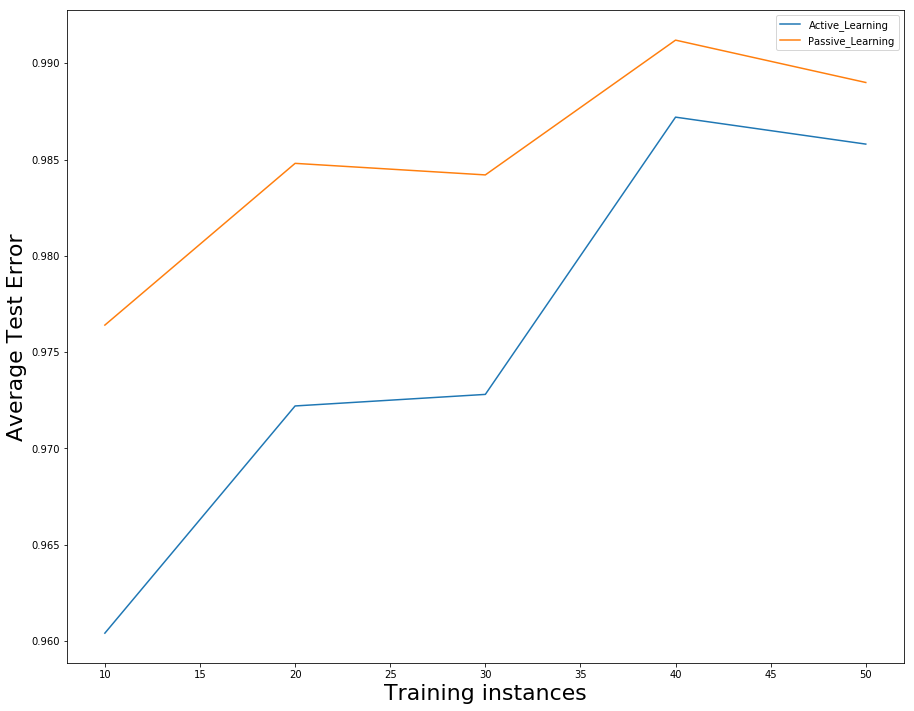

In [28]:

plt.figure(figsize=(15,12))
plt.xlabel('Training instances', fontsize=22)
plt.ylabel('Average Test Error', fontsize=22)
plt.plot(training_instances, active_errortotal_test,label='Active_Learning')
plt.plot(training_instances, passive_test_totalerror,label='Passive_Learning')
plt.legend(loc='best')
plt.show()